<a href="https://colab.research.google.com/github/kchabin/pp_tech/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import pairwise_distances

In [4]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
d1 = pd.read_csv("/content/data 1_midterm.csv")
print(d1)

      age  income  family_num  credit_loan
0      25      49           4            0
1      45      34           3            0
2      39      11           1            0
3      35     100           1            0
4      35      45           4            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[2500 rows x 4 columns]


Îç∞Ïù¥ÌÑ∞
- Î™®Îç∏ Í∞úÎ∞ú Ïãú , Í∏∞Î≥∏ Î∂ÑÏÑùÏóêÎäî data 1 ÏÇ¨Ïö©
- ÎÇòÏù¥ , ÏÜåÎìù , Í∞ÄÏ°± ÏàòÎäî Ï§ÄÏãùÎ≥ÑÏûê , Ïã†Ïö© ÎåÄÏ∂ú Ïó¨Î∂ÄÎäî ÎØºÍ∞êÏ†ïÎ≥¥Î°ú
ÏÇ¨Ïö©ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú

ÏÉÅÌïòÎã® ÏΩîÎî© or Î≤îÏ£ºÌôî
- Îëò Ï§ë ÌïòÎÇòÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÌïòÎ©¥ ÎêòÎäîÍ±¥ÏßÄ Ïó¨Ï≠§Î≥¥Í∏∞
- ÏÉÅÌïòÎã® ÏΩîÎî© ÌõÑ Î≤îÏ£ºÌôî

### data 1 Îç∞Ïù¥ÌÑ∞ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ÌïòÍ∏∞

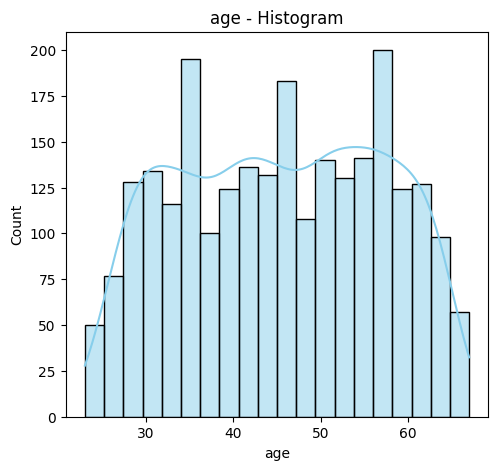

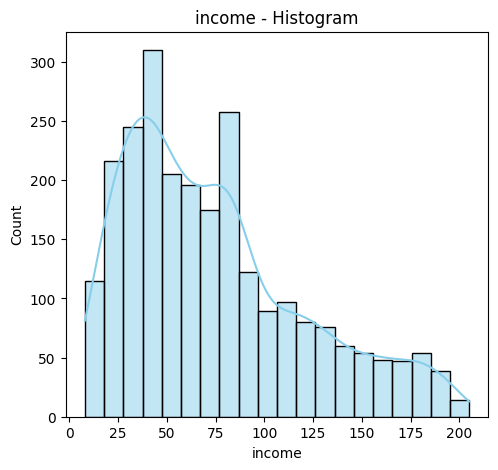

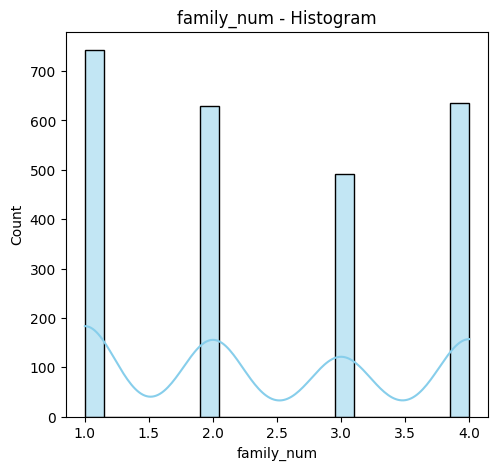

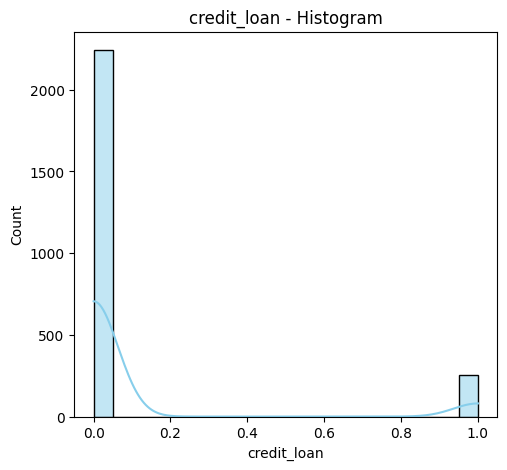

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# ÌûàÏä§ÌÜ†Í∑∏Îû® & Î∞ïÏä§ÌîåÎ°ØÏùÑ Í∑∏Î¶¥ Ïª¨Îüº Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï
columns = ['age', 'income', 'family_num', 'credit_loan']  # ÏòàÏãú: ÎÇòÏù¥, ÏÜåÎìù, Í∞ÄÏ°±Ïàò

# ÏãúÍ∞ÅÌôî ÏãúÏûë
for col in columns:
    plt.figure(figsize=(12,5))

    # ÌûàÏä§ÌÜ†Í∑∏Îû®
    plt.subplot(1, 2, 1)
    sns.histplot(d1[col], kde=True, bins=20, color='skyblue')
    plt.title(f'{col} - Histogram')


    plt.show()


## Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò ÏÉÅÌïòÎã® ÏΩîÎî©

In [92]:
def apply_coding_normal(df, column, sigma_range):
    # Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î∞©ÏßÄ
    df_copy = df.copy()
    mean = df_copy[column].mean()
    std = df_copy[column].std()

    lower_bound = mean - sigma_range * std
    upper_bound = mean + sigma_range * std

    print(f"Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞í (¬±{sigma_range}œÉ) for {column}: {lower_bound:.1f} ~ {upper_bound:.1f}")

    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound).round().astype(int)
    return df_copy


In [93]:
df_norm = apply_coding_normal(d1, column='income', sigma_range=3)
df_norm = apply_coding_normal(df_norm, column='age', sigma_range=3)
df_norm.tail(100)

Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞í (¬±3œÉ) for income: -65.6 ~ 214.5
Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞í (¬±3œÉ) for age: 10.8 ~ 79.9


age  income  family_num  credit_loan
2400   61     169           2            1
2401   42      63           2            0
2402   48      23           3            0
2403   38     140           4            1
2404   41      75           1            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[100 rows x 4 columns]

In [100]:
d1_sig2 = apply_coding_normal(d1, column='income', sigma_range=2)
d1_sig2 = apply_coding_normal(d1_sig2, column='age', sigma_range=2)
d1_sig2.tail(100)

age  income  family_num  credit_loan
2400   61     168           2            1
2401   42      63           2            0
2402   48      23           3            0
2403   38     140           4            1
2404   41      75           1            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[100 rows x 4 columns]

`family_num`ÏóêÎèÑ ÏÉÅÌïòÎã® ÏΩîÎî©ÏùÑ Ï†ÅÏö©Ìï¥Ïïº ÌïòÎÇòÏöî... -> no

sigmaÍ∞íÏùÑ 1~3 Ï§ë Ï†ÅÏö©Ìïú Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÍ≥† Í∑∏ Ï§ëÏóêÏÑú ÏµúÏ†Å Í∞í ÏÑ†ÌÉù

** ÌïµÏã¨ ÏöîÏ†ê**

apply_coding_normal Ìï®ÏàòÎäî ÎÑòÍ≤®Ï§Ä dfÏùò Î≥µÏÇ¨Î≥∏ÏùÑ Î∞òÌôòÌïòÎäî Íµ¨Ï°∞.

Îëê Î≤à Ìò∏Ï∂úÌï† Îïå Í∞ôÏùÄ d1 ÏõêÎ≥∏ÏùÑ ÎÑòÍ∏∞Î©¥ Ïù¥Ï†Ñ Ï†ÅÏö© Í≤∞Í≥ºÍ∞Ä ÏÇ¨ÎùºÏßÑÎã§.

ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÎ†§Î©¥, Ï≤´ Î≤àÏß∏ Í≤∞Í≥ºÎ•º Îëê Î≤àÏß∏ Ìï®ÏàòÏóê ÎÑòÍ≤®Ï§òÏïº Ìï®.

In [11]:
d1_norm = d1.copy()
# income Ïª¨ÎüºÏóê ÎåÄÌï¥ ÌÅ¥Î¶¨Ìïë Ï†ÅÏö©
d1_norm = apply_coding_normal(d1_norm, column='income', sigma_range=1)

# incomeÏóê ÌÅ¥Î¶¨Ìïë Ï†ÅÏö© ÌõÑ, age Ïª¨ÎüºÏóê ÎåÄÌï¥ ÌÅ¥Î¶¨Ìïë Ï†ÅÏö©
d1_norm = apply_coding_normal(d1_norm, column='age', sigma_range=1)

# Í≤∞Í≥º ÌôïÏù∏
print(d1_norm.tail(100))


Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞í (¬±1œÉ) for income: 27.8 ~ 121.1
Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞í (¬±1œÉ) for age: 33.8 ~ 56.9
      age  income  family_num  credit_loan
2400   57     121           2            1
2401   42      63           2            0
2402   48      28           3            0
2403   38     121           4            1
2404   41      75           1            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   57      32           3            0
2497   34      28           3            0
2498   38     111           2            0
2499   53      38           4            0

[100 rows x 4 columns]


Í∞ÄÏû• Ï†ïÍ∑úÎ∂ÑÌè¨ Í≤ΩÍ≥ÑÍ∞íÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î≥¥Ïù¥Îäî Í±¥ sigma_range=1 Ïùº ÎïåÏòÄÏùå

## Î≤îÏ£ºÌôî

### ÎÇòÏù¥ 10. ÏÜåÎìù 20

In [12]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 10
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 20
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~43   48~67        3~4            0
1  44~53   28~47        3~4            0
2  34~43   28~47        1~2            0
3  34~43  88~107        1~2            0
4  34~43   28~47        3~4            0


### ÎÇòÏù¥ 10. ÏÜåÎìù 30

In [ ]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned2 = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned2.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 10
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 30
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~43   28~57        3~4            0
1  44~53   28~57        3~4            0
2  34~43   28~57        1~2            0
3  34~43  88~117        1~2            0
4  34~43   28~57        3~4            0


### ÎÇòÏù¥ 40. ÏÜåÎìù 70

In [ ]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned3 = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned3.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 40
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 70
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~73   28~97        3~4            0
1  34~73   28~97        3~4            0
2  34~73   28~97        1~2            0
3  34~73  98~167        1~2            0
4  34~73   28~97        3~4            0


### ÎÇòÏù¥ 10. ÏÜåÎìù 10

In [ ]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned4 = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned4.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 10
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 10
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~43   48~57        3~4            0
1  44~53   28~37        3~4            0
2  34~43   28~37        1~2            0
3  34~43  98~107        1~2            0
4  34~43   38~47        3~4            0


### ÎÇòÏù¥ 15, ÏÜåÎìù 20

In [ ]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned5 = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned5.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 15
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 20
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~48   48~67        3~4            0
1  34~48   28~47        3~4            0
2  34~48   28~47        1~2            0
3  34~48  88~107        1~2            0
4  34~48   28~47        3~4            0


### ÎÇòÏù¥ 10. ÏÜåÎìù 15

In [21]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
            bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
            bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned6 = apply_binning(d1_norm, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned6.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 10
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 15
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 2
     age  income family_num  credit_loan
0  34~43   43~57        3~4            0
1  44~53   28~42        3~4            0
2  34~43   28~42        1~2            0
3  34~43  88~102        1~2            0
4  34~43   43~57        3~4            0


### ÎÇòÏù¥ 15, ÏÜåÎìù 10, Í∞ÄÏ°± Ïàò 3, ÏãúÍ∑∏Îßà = 2

In [106]:
import pandas as pd

def apply_binning(df, age_bin, income_bin, fam_bin):
    def bin_column(data, col, bin_size):
        min_val = int(data[col].min())
        max_val = int(data[col].max())

        # family_numÏùÄ ÏµúÎåÄÍ∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏïÑÏÑú Î≤îÏ£º Íµ¨Í∞ÑÏù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞ Ï≤òÎ¶¨
        if bin_size >= (max_val - min_val + 1):
          bins = [min_val, max_val + 1]  # ÏµúÏÜå-ÏµúÎåÄ Ìïú Íµ¨Í∞ÑÎßå ÏÉùÏÑ±
        else:
          bins = list(range(min_val, max_val + bin_size, bin_size))

        labels = [f"{b}~{b+bin_size-1}" for b in bins[:-1]]
        return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

    df = df.copy()
    df['age'] = bin_column(df, 'age', age_bin)
    df['income'] = bin_column(df, 'income', income_bin)
    df['family_num'] = bin_column(df, 'family_num', fam_bin)

    return df

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•
age_bin = int(input("ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): "))
income_bin = int(input("ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): "))
fam_bin = int(input("Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): "))

# Ï†ÅÏö©
d1_norm_binned7 = apply_binning(d1_sig2, age_bin=age_bin, income_bin=income_bin, fam_bin=fam_bin)

# ÌôïÏù∏
print(d1_norm_binned7.head())


ÎÇòÏù¥ Î≤îÏúÑ(Ïòà: 10): 15
ÏÜåÎìù Î≤îÏúÑ(Ïòà: 20): 10
Í∞ÄÏ°± Ïàò Î≤îÏúÑ(Ïòà: 2): 4
     age  income family_num  credit_loan
0  23~37   48~57        1~4            0
1  38~52   28~37        1~4            0
2  38~52    8~17        1~4            0
3  23~37  98~107        1~4            0
4  23~37   38~47        1~4            0


## K-ÏùµÎ™ÖÏÑ± - Ï†ïÍ∑úÎ∂ÑÌè¨ ÏÉÅÌïòÎã®ÏΩîÎî©


In [ ]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned['homo_group'] = d1_norm_binned.groupby(quasi_identifiers).ngroup()

# 'd1_binned'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned['homo_group'])


0        3
1       11
2        0
3        6
4        1
        ..
2495    15
2496    21
2497     1
2498     8
2499    11
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-59-fff4984a3f8c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned['homo_group'] = d1_norm_binned.groupby(quasi_identifiers).ngroup()


In [ ]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned2[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned2[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned2['homo_group'] = d1_norm_binned2.groupby(quasi_identifiers).ngroup()

# 'd1_binned'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned2['homo_group'])


0        1
1        9
2        0
3        4
4        1
        ..
2495    11
2496    17
2497     1
2498     4
2499     9
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-63-b1558a26067b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned2['homo_group'] = d1_norm_binned2.groupby(quasi_identifiers).ngroup()


In [ ]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned3[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned3[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned3['homo_group'] = d1_norm_binned3.groupby(quasi_identifiers).ngroup()

# 'd1_binned'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned3['homo_group'])


0       1
1       1
2       0
3       2
4       1
       ..
2495    1
2496    1
2497    1
2498    2
2499    1
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-47-d93223cd21d7>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned3['homo_group'] = d1_norm_binned3.groupby(quasi_identifiers).ngroup()


ÎëêÎ≤àÏß∏ Ïã§Ïäµ : Í∞ÄÏ°± ÏàòÏùò Î≤îÏúÑÎ•º 2Î°ú Ï†ïÌñàÏùÑ Îïå.
- Îã§Î•∏ ÏßÄÌëúÎäî ÎèôÏùº

In [ ]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned4[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned4[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned4['homo_group'] = d1_norm_binned4.groupby(quasi_identifiers).ngroup()

# 'd2_binned'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned4['homo_group'])


0        5
1       21
2        0
3       14
4        3
        ..
2495    29
2496    41
2497     1
2498    16
2499    23
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-70-6415f50d4b74>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned4['homo_group'] = d1_norm_binned4.groupby(quasi_identifiers).ngroup()


In [ ]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned5[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned5[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned5['homo_group'] = d1_norm_binned5.groupby(quasi_identifiers).ngroup()

# 'd1_norm_binned5'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned5['homo_group'])


0        3
1        1
2        0
3        6
4        1
        ..
2495     5
2496    11
2497     1
2498     8
2499    11
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-18-e82014573dfe>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned5['homo_group'] = d1_norm_binned5.groupby(quasi_identifiers).ngroup()


In [22]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned6[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned6[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned6['homo_group'] = d1_norm_binned6.groupby(quasi_identifiers).ngroup()

# 'd1_norm_binned6'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned6['homo_group'])


0        3
1       15
2        0
3        8
4        3
        ..
2495    19
2496    29
2497     1
2498    10
2499    15
Name: homo_group, Length: 2500, dtype: int64


<ipython-input-22-4bb44f7b04b4>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_norm_binned6['homo_group'] = d1_norm_binned6.groupby(quasi_identifiers).ngroup()


In [107]:
# Ï§ÄÏãùÎ≥ÑÏûêÏôÄ ÎØºÍ∞êÏ†ïÎ≥¥ Î∂ÑÎ¶¨
quasi_identifiers = ['age', 'income', 'family_num']
sensitive_attribute = 'credit_loan'

df_qi = d1_norm_binned7[quasi_identifiers]  # Ï§ÄÏãùÎ≥ÑÏûê
df_sensitive = d1_norm_binned7[sensitive_attribute]  # ÎØºÍ∞êÏ†ïÎ≥¥

# Ï§ÄÏãùÎ≥ÑÏûê Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ 'homo_group' ÏÉùÏÑ±
d1_norm_binned7['homo_group'] = d1_norm_binned7.groupby(quasi_identifiers).ngroup()

# 'd1_norm_binned7'ÏóêÏÑú 'homo_group' Ï∂úÎ†•
print(d1_norm_binned7['homo_group'])


0        4.0
1       18.0
2       16.0
3        9.0
4        3.0
        ... 
2495    22.0
2496    34.0
2497     0.0
2498    26.0
2499    35.0
Name: homo_group, Length: 2500, dtype: float64


### ÎÇòÏù¥ Î≤îÏúÑ: 10, ÏÜåÎìù Î≤îÏúÑ: 20, Í∞ÄÏ°± Ïàò: 2 Î≤îÏ£ºÌôî Í≤∞Í≥º

In [ ]:
group_sizes = d1_norm_binned.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k) #15

homo_group
0     187
1     176
2      71
3     115
4      82
5     124
6      61
7      36
8     202
9      75
10    111
11    122
12     35
13     31
14     66
15     66
16     32
17     15
18    118
19     28
20    152
21    138
22     61
23     88
24     45
25     50
26     44
27     23
28    106
29     40
dtype: int64
15


In [ ]:
diversities =d1_norm_binned.groupby('homo_group')[sensitive_attribute].nunique()
print(diversities)

homo_group
0     1
1     1
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    1
21    1
22    1
23    1
24    2
25    1
26    2
27    2
28    2
29    2
Name: credit_loan, dtype: int64


### ÎÇòÏù¥ Î≤îÏúÑ: 10, ÏÜåÎìù Î≤îÏúÑ: 30, Í∞ÄÏ°± Ïàò: 2 Î≤îÏ£ºÌôî Í≤∞Í≥º

In [ ]:
group_sizes = d1_norm_binned2.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k)

homo_group
0     225
1     240
2     115
3     175
4      95
5      58
6     168
7      53
8     127
9     135
10     85
11     84
12     44
13     17
14    106
15     26
16    180
17    184
18     78
19     92
20     64
21     30
22     86
23     33
dtype: int64
17


### ÎÇòÏù¥: 40, ÏÜåÎìù Î≤îÏúÑ: 70, Í∞ÄÏ°± Ïàò: 2

In [ ]:
group_sizes = d1_norm_binned3.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k)

homo_group
0    893
1    949
2    480
3    178
dtype: int64
178


### ÎÇòÏù¥ Î≤îÏúÑ: 10, ÏÜåÎìù Î≤îÏúÑ: 10, Í∞ÄÏ°± Ïàò: 2 Î≤îÏ£ºÌôî Í≤∞Í≥º

In [ ]:
group_sizes = d1_norm_binned4.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k)

homo_group
0     118
1     116
2      69
3      60
4      38
5      64
6      33
7      51
8      21
9      64
10     61
11     60
12     30
13     21
14     31
15     15
16     34
17     22
18    168
19     53
20     79
21     77
22     32
23     45
24     16
25     13
26     19
27     18
28     30
29     23
30     36
31     43
32     24
33      9
34      8
35      6
36     12
37      2
38    106
39     26
40    102
41     84
42     50
43     54
44     28
45     46
46     33
47     42
48     20
49     17
50     25
51     33
52     29
53      9
54     15
55     14
56     20
57      7
58     86
59     33
dtype: int64
2


### ÎÇòÏù¥ 15, ÏÜåÎìù 20

In [ ]:
group_sizes = d1_norm_binned5.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k)

homo_group
0     235
1     218
2      88
3     131
4     112
5     171
6      71
7      46
8     270
9      88
10    215
11    218
12     79
13    103
14     81
15     69
16     66
17     28
18    156
19     55
dtype: int64
28


### ÎÇòÏù¥ 10 ÏÜåÎìù 15 Í∞ÄÏ°±Ïàò 2
k=3 ÎßåÏ°±

In [109]:
group_sizes = d1_norm_binned6.groupby('homo_group').size()
min_k = group_sizes.min()
print(min_k)

3


### ÎÇòÏù¥ 15 ÏÜåÎìù 10 Í∞ÄÏ°±Ïàò 4 sigma = 2
 k=9ÏôÄ k=3 ÎπÑÍµê:

- k=3: ÎèôÏùºÌïú Ï§ÄÏãùÎ≥ÑÏûê Ï°∞Ìï©ÏùÑ Í∞ÄÏßÑ Î†àÏΩîÎìúÍ∞Ä ÏµúÏÜå 3Í∞ú Ï°¥Ïû¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú ÌäπÏ†ï Î†àÏΩîÎìúÎ•º 1/3 ÌôïÎ•†Î°ú ÌäπÏ†ï Í∞úÏù∏Í≥º Ïó∞Í≤∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- k=9: ÎèôÏùºÌïú Ï§ÄÏãùÎ≥ÑÏûê Ï°∞Ìï©ÏùÑ Í∞ÄÏßÑ Î†àÏΩîÎìúÍ∞Ä ÏµúÏÜå 9Í∞ú Ï°¥Ïû¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú ÌäπÏ†ï Î†àÏΩîÎìúÎ•º 1/9 ÌôïÎ•†Î°ú ÌäπÏ†ï Í∞úÏù∏Í≥º Ïó∞Í≤∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Îçî ÎÜíÏùÄ k Í∞íÏùò Ïû•Ï†ê:

- Ïû¨ÏãùÎ≥Ñ ÏúÑÌóò Í∞êÏÜå: k Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÌäπÏ†ï Í∞úÏù∏ÏùÑ Îã§Ïãú ÏãùÎ≥ÑÌï¥ÎÇº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÏïÑÏ†∏ Í∞úÏù∏ Ï†ïÎ≥¥ Î≥¥Ìò∏Í∞Ä Í∞ïÌôîÎê©ÎãàÎã§.
- ÌîÑÎùºÏù¥Î≤ÑÏãú Í∞ïÌôî: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Ïãú Í∞úÏù∏ Ï†ïÎ≥¥ ÎÖ∏Ï∂úÏóê ÎåÄÌïú Ïö∞Î†§Î•º Ï§ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.




In [108]:
group_sizes = d1_norm_binned7.groupby('homo_group').size()
min_k = group_sizes.min()
k = group_sizes
print(k)
print(min_k)

homo_group
0.0      26
1.0      47
2.0      78
3.0      99
4.0      67
5.0      51
6.0      53
7.0      78
8.0      25
9.0      32
10.0     35
11.0     28
12.0     21
13.0     19
14.0     17
15.0      9
16.0     51
17.0     83
18.0     93
19.0     97
20.0     62
21.0     66
22.0     82
23.0    120
24.0     52
25.0     25
26.0     35
27.0     32
28.0     26
29.0     26
30.0     23
31.0     19
32.0     38
33.0     86
34.0     74
35.0    114
36.0     76
37.0     79
38.0     40
39.0     60
40.0     45
41.0     32
42.0     27
43.0     20
44.0     29
45.0     15
46.0     14
47.0     20
dtype: int64
9


In [24]:
from google.colab import files

d1_norm_binned6.to_csv('d1_k=3.csv', index=False)

files.download('d1_k=3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ïú†Ïö©ÏÑ± ÏßÄÌëú


### Euclidian Distance_Sum of Squared Errors
1. Í∞Å Ï∞®ÏõêÎ≥Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
Îëê Î≤°ÌÑ∞ A=[a1,a2,...,an]ÏôÄ B=[b1,b2,...,bn]Ïùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞
2. Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
3. Î£®Ìä∏ Í≥ÑÏÇ∞

In [ ]:
#d1, d1_binned ÎπÑÍµê
d1 = pd.read_csv("/content/data 1_midterm.csv")
d1_nb_sse = pd.read_csv("/content/d1_norm_binned1.csv")
print(d1)
print(d1_nb_sse)

      age  income  family_num  credit_loan
0      25      49           4            0
1      45      34           3            0
2      39      11           1            0
3      35     100           1            0
4      35      45           4            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[2500 rows x 4 columns]
        age  income family_num  credit_loan
0     33~62   27~96        1~4            0
1     33~62   27~96        1~4            0
2     33~62   27~96        1~4            0
3     33~62  97~166        1~4            0
4     33~62   27~96        1~4            0
...     ...     ...        ...          ...
2495  33~62   27~96        1~4            0
2496  33~62   27~96        1~4            0
2497  33~62   27~96        1~4            0
2498  33~62  97~166

In [ ]:
#ÎÇòÏù¥ 30, ÏÜåÎìù 70Î≤îÏúÑÎ°ú ÌñàÏùÑ Îïå
d1 = pd.read_csv("/content/data 1_midterm.csv")
d1_nb_sse2 = pd.read_csv("/content/d1_norm_binned2.csv")
print(d1)
print(d1_nb_sse2)

      age  income  family_num  credit_loan
0      25      49           4            0
1      45      34           3            0
2      39      11           1            0
3      35     100           1            0
4      35      45           4            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[2500 rows x 4 columns]
        age  income family_num  credit_loan  homo_group
0     34~63   28~97        3~4            0           1
1     34~63   28~97        3~4            0           1
2     34~63   28~97        1~2            0           0
3     34~63  98~167        1~2            0           2
4     34~63   28~97        3~4            0           1
...     ...     ...        ...          ...         ...
2495  34~63   28~97        3~4            0           1
2496  34~63

In [26]:
#ÎÇòÏù¥ 10, ÏÜåÎìù 15Î≤îÏúÑÎ°ú ÌñàÏùÑ Îïå
d1 = pd.read_csv("/content/data 1_midterm.csv")
d1_k = pd.read_csv("/content/d1_k_sse.csv")
print(d1)
print(d1_k)

      age  income  family_num  credit_loan
0      25      49           4            0
1      45      34           3            0
2      39      11           1            0
3      35     100           1            0
4      35      45           4            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[2500 rows x 4 columns]
        age   income family_num  credit_loan
0     34~43    43~57        3~4            0
1     44~53    28~42        3~4            0
2     34~43    28~42        1~2            0
3     34~43   88~102        1~2            0
4     34~43    43~57        3~4            0
...     ...      ...        ...          ...
2495  44~53    58~72        3~4            0
2496  54~63    28~42        3~4            0
2497  34~43    28~42        3~4            0
2498  34~

In [ ]:
#ÎÇòÏù¥ 30, ÏÜåÎìù 70Î≤îÏúÑ
#ÏõêÎ≥∏Í≥º Î≥ÄÌòï Îç∞Ïù¥ÌÑ∞ Í∞Ñ Ïú†Ïö©ÏÑ± ÏßÄÌëú ÌôïÏù∏
from google.colab import files
def bin_label_to_midpoint(series):
    """'Ïà´Ïûê~Ïà´Ïûê' Î≤îÏúÑ Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò"""
    def midpoint(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) / 2
    return series.apply(midpoint)

def calculate_sse(original_df, binned_df):
    """ÏõêÎ≥∏Í≥º Î≤îÏ£ºÌôî Î≥µÏõêÍ∞íÏùò SSE Ïú†Ïö©ÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num']].astype(float)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_midpoint(binned_df['age']),
        'income': bin_label_to_midpoint(binned_df['income']),
        'family_num': bin_label_to_midpoint(binned_df['family_num'])
    })
    print(binned_numeric)



    binned_numeric.to_csv('sse_res.csv', index=False)

    files.download('sse_res.csv')

    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú SSE
    return sse


# ÏÇ¨Ïö© ÏòàÏãú
sse_result = calculate_sse(d1, d1_nb_sse2)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .1f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .1f}")



       age  income  family_num
0     48.5    62.5         3.5
1     48.5    62.5         3.5
2     48.5    62.5         1.5
3     48.5   132.5         1.5
4     48.5    62.5         3.5
...    ...     ...         ...
2495  48.5    62.5         3.5
2496  48.5    62.5         3.5
2497  48.5    62.5         3.5
2498  48.5   132.5         1.5
2499  48.5    62.5         3.5

[2500 rows x 3 columns]
Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  2239093.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  1496.4


In [ ]:
#ÎÇòÏù¥ 40, ÏÜåÎìù 70 Î≤îÏúÑ
d1 = pd.read_csv("/content/data 1_midterm.csv")
d1_nb_sse3 = pd.read_csv("/content/d1_norm_binned3.csv")
print(d1)
print(d1_nb_sse3)

      age  income  family_num  credit_loan
0      25      49           4            0
1      45      34           3            0
2      39      11           1            0
3      35     100           1            0
4      35      45           4            0
...   ...     ...         ...          ...
2495   46      70           4            0
2496   63      32           3            0
2497   33      14           3            0
2498   38     111           2            0
2499   53      38           4            0

[2500 rows x 4 columns]
        age  income family_num  credit_loan  homo_group
0     34~73   28~97        3~4            0           1
1     34~73   28~97        3~4            0           1
2     34~73   28~97        1~2            0           0
3     34~73  98~167        1~2            0           2
4     34~73   28~97        3~4            0           1
...     ...     ...        ...          ...         ...
2495  34~73   28~97        3~4            0           1
2496  34~73

In [ ]:
# ÏòàÏãú: Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1_binned = Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1 = ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

def bin_label_to_midpoint(series):
    """'Ïà´Ïûê~Ïà´Ïûê' Î≤îÏúÑ Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò"""
    def midpoint(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) / 2
    return series.apply(midpoint)

def calculate_sse(original_df, binned_df):
    """ÏõêÎ≥∏Í≥º Î≤îÏ£ºÌôî Î≥µÏõêÍ∞íÏùò SSE Ïú†Ïö©ÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num']].astype(float)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_midpoint(binned_df['age']),
        'income': bin_label_to_midpoint(binned_df['income']),
        'family_num': bin_label_to_midpoint(binned_df['family_num'])
    })
    print(binned_numeric)

    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú SSE
    return sse


#ÎÇòÏù¥ 40, ÏÜåÎìù 70 Î≤îÏúÑ
sse_result = calculate_sse(d1, d1_nb_sse3)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .1f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .1f}")



       age  income  family_num
0     53.5    62.5         3.5
1     53.5    62.5         3.5
2     53.5    62.5         1.5
3     53.5   132.5         1.5
4     53.5    62.5         3.5
...    ...     ...         ...
2495  53.5    62.5         3.5
2496  53.5    62.5         3.5
2497  53.5    62.5         3.5
2498  53.5   132.5         1.5
2499  53.5    62.5         3.5

[2500 rows x 3 columns]
Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  2380443.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  1542.9


In [ ]:
# ÏòàÏãú: Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1_binned = Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1 = ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
from google.colab import files
def bin_label_to_midpoint(series):
    """'Ïà´Ïûê~Ïà´Ïûê' Î≤îÏúÑ Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò"""
    def midpoint(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) // 2
    return series.apply(midpoint)

def calculate_sse(original_df, binned_df):
    """ÏõêÎ≥∏Í≥º Î≤îÏ£ºÌôî Î≥µÏõêÍ∞íÏùò SSE Ïú†Ïö©ÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num']].astype(int)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_midpoint(binned_df['age']),
        'income': bin_label_to_midpoint(binned_df['income']),
        'family_num': bin_label_to_midpoint(binned_df['family_num'])
    })

    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú SSE
    return sse


#ÎÇòÏù¥ 10, ÏÜåÎìù 15 Î≤îÏúÑ
sse_result = calculate_sse(d1, d1_k)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .1f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .1f}")



       age  income  family_num
0     38.0    50.0         3.0
1     48.0    35.0         3.0
2     38.0    35.0         1.0
3     38.0    95.0         1.0
4     38.0    50.0         3.0
...    ...     ...         ...
2495  48.0    65.0         3.0
2496  58.0    35.0         3.0
2497  38.0    35.0         3.0
2498  38.0   110.0         1.0
2499  48.0    35.0         3.0

[2500 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  851649.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  922.8


In [27]:
# ÏòàÏãú: Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1_binned = Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1 = ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
from google.colab import files
def bin_label_to_midpoint(series):
    """'Ïà´Ïûê~Ïà´Ïûê' Î≤îÏúÑ Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò"""
    def midpoint(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) // 2
    return series.apply(midpoint)

def calculate_sse(original_df, binned_df):
    """ÏõêÎ≥∏Í≥º Î≤îÏ£ºÌôî Î≥µÏõêÍ∞íÏùò SSE Ïú†Ïö©ÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num', 'credit_loan']].astype(int)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_midpoint(binned_df['age']),
        'income': bin_label_to_midpoint(binned_df['income']),
        'family_num': bin_label_to_midpoint(binned_df['family_num'])
    })
    print(binned_numeric)
    binned_numeric.to_csv('sse_res.csv', index=False)

    files.download('sse_res.csv')
    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú SSE
    return sse


#ÎÇòÏù¥ 10, ÏÜåÎìù 15 Î≤îÏúÑ
sse_result = calculate_sse(d1, d1_k)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .0f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .0f}")



       age  income  family_num
0     38.0    50.0         3.0
1     48.0    35.0         3.0
2     38.0    35.0         1.0
3     38.0    95.0         1.0
4     38.0    50.0         3.0
...    ...     ...         ...
2495  48.0    65.0         3.0
2496  58.0    35.0         3.0
2497  38.0    35.0         3.0
2498  38.0   110.0         1.0
2499  48.0    35.0         3.0

[2500 rows x 3 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  851649
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  923


### d1_norm_binned1.csvÏóê ÎåÄÌïú sse Í≤∞Í≥º
#### Î≤îÏúÑÎ•º Ï§ëÏïôÍ∞íÏúºÎ°ú ÏπòÌôòÌïòÏó¨ Ïú†Ïö©ÏÑ± ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï®

```
       age  income  family_num
0     47.5    61.5         2.5
1     47.5    61.5         2.5
2     47.5    61.5         2.5
3     47.5   131.5         2.5
4     47.5    61.5         2.5
...    ...     ...         ...
2495  47.5    61.5         2.5
2496  47.5    61.5         2.5
2497  47.5    61.5         2.5
2498  47.5   131.5         2.5
2499  47.5    61.5         2.5

[2500 rows x 3 columns]
Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  2198697.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  1482.8
```

> ÏÉÅÌïòÎã® ÏΩîÎî©ÏùÑ Í±∞Ïπú Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞òÏùò Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î°ú Ïù∏Ìï¥ Í≤ΩÍ≥ÑÍ∞í Í∑ºÏ≤òÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î¶¨Îäî ÌäπÏÑ±ÏùÑ Í∞ñÏäµÎãàÎã§. Ïù¥ Í≤ΩÏö∞ Î≤îÏ£ºÌôîÎêú Í∞íÏù¥ Í∑†Îì±Î∂ÑÌè¨ÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ∏∞ Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏Ïóê, ÌèâÍ∑†Í∞íÎ≥¥Îã§ Ï§ëÏïôÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥µÏõêÏùò ÏôúÍ≥°ÏùÑ Ï§ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.

- ÏÉÅÌïòÎã® ÏΩîÎî© ÌõÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïùò ÌäπÏßï: Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞òÏùò Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (ÏÉÅÌïòÎã® ÏΩîÎî©)Îäî ÏßÄÏ†ïÎêú Î∂ÑÏúÑÏàò Î∞ñÏùò Í∞íÎì§ÏùÑ Í∑∏ Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÄ ÏõêÎûò Íº¨Î¶¨ Î∂ÄÎ∂ÑÏóê Ìù©Ïñ¥Ï†∏ ÏûàÎçò Ïù¥ÏÉÅÏπòÎì§ÏùÑ Í≤ΩÍ≥Ñ Í∞íÏù¥ÎùºÎäî ÌäπÏ†ï ÏßÄÏ†êÏóê ÏßëÏ§ëÏãúÌÇ§Îäî Ìö®Í≥ºÎ•º ÎÇ≥ÏäµÎãàÎã§. Îî∞ÎùºÏÑú, Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Îäî Îçî Ïù¥ÏÉÅ ÏôÑÎ≤ΩÌïú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏúºÎ©∞, Í≤ΩÍ≥ÑÍ∞í Í∑ºÏ≤òÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î¶¨Îäî (ÎàÑÏ†ÅÎêòÎäî) ÌòïÌÉúÎ•º Îù±ÎãàÎã§.

- Î≤îÏ£ºÌôîÎêú Í∞íÏùò Í∑†Îì±Î∂ÑÌè¨ Í∞ÄÏ†ïÏùò Ïñ¥Î†§ÏõÄ: Í≤ΩÍ≥ÑÍ∞íÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î†§ÏûàÎäî ÏÉÅÌô©ÏóêÏÑú Ïù¥Î•º ÏûÑÏùòÏùò Í∏∞Ï§ÄÏúºÎ°ú Î≤îÏ£ºÌôîÌïòÎ©¥, Í∞Å Î≤îÏ£ºÏóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä ÌÅ¨Í≤å Î∂àÍ∑†ÌòïÌï¥Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§. ÌäπÏ†ï Í≤ΩÍ≥ÑÍ∞íÏùÑ Ìè¨Ìï®ÌïòÎäî Î≤îÏ£ºÏóê ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßëÏ§ëÎê† Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú, Î≤îÏ£ºÌôîÎêú Í∞íÏùÑ Í∑†Îì±Î∂ÑÌè¨ÎùºÍ≥† Í∞ÄÏ†ïÌïòÎäî Í≤ÉÏùÄ Îß§Ïö∞ ÏúÑÌóòÌïòÎ©∞, Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú Î∂ÑÌè¨Î•º Ïã¨Í∞ÅÌïòÍ≤å ÏôúÍ≥°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### ÌèâÍ∑†Í∞í vs. Ï§ëÏïôÍ∞í:

- ÌèâÍ∑†Í∞í: ÌèâÍ∑†Í∞íÏùÄ Î™®Îì† Îç∞Ïù¥ÌÑ∞ Í∞íÏùò Ìï©ÏùÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ°ú ÎÇòÎàà Í∞íÏúºÎ°ú, Í∑πÎã®Ï†ÅÏù∏ Í∞íÏóê ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌï©ÎãàÎã§. ÏÉÅÌïòÎã® ÏΩîÎî©ÏúºÎ°ú Ïù∏Ìï¥ Í≤ΩÍ≥ÑÍ∞íÏóê Î™∞Î¶∞ Îç∞Ïù¥ÌÑ∞Îäî Í∑∏ Í∞í ÏûêÏ≤¥Îäî Í∑πÎã®Ï†ÅÏù¥ÏßÄ ÏïäÎçîÎùºÎèÑ, Í∑∏ ÎπàÎèÑÍ∞Ä ÎÜíÏïÑÏ†∏ ÌèâÍ∑†Í∞íÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. ÌäπÌûà Î≤îÏ£ºÌôî Í≥ºÏ†ïÏóêÏÑú Í∞Å Î≤îÏ£ºÏùò ÎåÄÌëúÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌèâÍ∑†ÏùÑ Ï∂îÏ†ïÌï† Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î¶∞ Í≤ΩÍ≥ÑÍ∞í Í∑ºÏ≤òÏùò Î≤îÏ£ºÍ∞Ä ÌèâÍ∑†Í∞íÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏúºÎ©∞, Ïù¥Îäî ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏã¨ Í≤ΩÌñ•ÏÑ±ÏùÑ ÏôúÍ≥°Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Ï§ëÏïôÍ∞í: Ï§ëÏïôÍ∞íÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Í∏∞ ÏàúÏÑúÎåÄÎ°ú ÎÇòÏó¥ÌñàÏùÑ Îïå Í∞ÄÏû• Ï§ëÏïôÏóê ÏúÑÏπòÌïòÎäî Í∞íÏûÖÎãàÎã§. Í∑πÎã®Ï†ÅÏù∏ Í∞íÏù¥ÎÇò ÌäπÏ†ï Í∞íÏùò ÎπàÎèÑÏóê Îçú ÎØºÍ∞êÌïòÎ©∞, Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏúÑÏπòÎ•º Îçî Ïûò ÎÇòÌÉÄÎÉÖÎãàÎã§. ÏÉÅÌïòÎã® ÏΩîÎî©ÏúºÎ°ú Ïù∏Ìï¥ Í≤ΩÍ≥ÑÍ∞íÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î¶¨ÎçîÎùºÎèÑ, Ï§ëÏïôÍ∞íÏùÄ Ïó¨Ï†ÑÌûà Îç∞Ïù¥ÌÑ∞Ïùò "Ï§ëÍ∞Ñ" ÏúÑÏπòÎ•º ÎπÑÍµêÏ†Å Ïûò Î∞òÏòÅÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§. Îî∞ÎùºÏÑú, ÌèâÍ∑†Í∞íÎ≥¥Îã§ Ï§ëÏïôÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏã¨ Í≤ΩÌñ•ÏÑ±ÏùÑ Îçî Ïûò Î≥¥Ï°¥ÌïòÍ≥†, Î≥µÏõêÏùò ÏôúÍ≥°ÏùÑ Ï§ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# ÏòàÏãú: Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1_binned = Î≤îÏ£ºÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# d1 = ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

def bin_label_to_midpoint(series):
    """'Ïà´Ïûê~Ïà´Ïûê' Î≤îÏúÑ Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò"""
    def midpoint(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) / 2
    return series.apply(midpoint)

def calculate_sse(original_df, binned_df):
    """ÏõêÎ≥∏Í≥º Î≤îÏ£ºÌôî Î≥µÏõêÍ∞íÏùò SSE Ïú†Ïö©ÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num']].astype(float)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_midpoint(binned_df['age']),
        'income': bin_label_to_midpoint(binned_df['income']),
        'family_num': bin_label_to_midpoint(binned_df['family_num'])
    })
    print(binned_numeric)

    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú SSE
    return sse


# ÏÇ¨Ïö© ÏòàÏãú
sse_result = calculate_sse(d1, d1_nb_sse)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .1f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .1f}")



       age  income  family_num
0     47.5    61.5         2.5
1     47.5    61.5         2.5
2     47.5    61.5         2.5
3     47.5   131.5         2.5
4     47.5    61.5         2.5
...    ...     ...         ...
2495  47.5    61.5         2.5
2496  47.5    61.5         2.5
2497  47.5    61.5         2.5
2498  47.5   131.5         2.5
2499  47.5    61.5         2.5

[2500 rows x 3 columns]
Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  2198697.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  1482.8


In [ ]:
def bin_label_to_mean(series):
    """'Ïà´Ïûê~Ïà´Ïûê' ÌòïÌÉúÏùò Î≤îÏ£º Î¨∏ÏûêÏó¥ÏùÑ ÌèâÍ∑†Í∞íÏúºÎ°ú Î≥ÄÌôò"""
    def mean_value(label):
        if pd.isna(label):
            return np.nan
        start, end = map(float, label.split('~'))
        return (start + end) / 2  # Ï§ëÏïôÍ∞íÍ≥º ÌèâÍ∑†Í∞íÏù¥ Í∞ôÏùå (Í∑†Îì±Î∂ÑÌè¨ Í∞ÄÏ†ï Ïãú)

    return series.apply(mean_value)


In [ ]:
def calculate_sse_mean(original_df, binned_df):
    """Î≤îÏ£ºÌôîÎêú Í∞í -> ÌèâÍ∑†Í∞íÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ïú†Ïö©ÏÑ± ÏßÄÌëú(SSE) Í≥ÑÏÇ∞"""
    original_numeric = original_df[['age', 'income', 'family_num']].astype(float)

    # Î≤îÏ£ºÌôîÎêú Î¨∏ÏûêÏó¥ÏùÑ ÌèâÍ∑†Í∞íÏúºÎ°ú Î≥ÄÌôò
    binned_numeric = pd.DataFrame({
        'age': bin_label_to_mean(binned_df['age']),
        'income': bin_label_to_mean(binned_df['income']),
        'family_num': bin_label_to_mean(binned_df['family_num'])
    })

    # Ï∞®Ïù¥ Ï†úÍ≥±Ìï© Í≥ÑÏÇ∞
    diff_squared = (original_numeric - binned_numeric) ** 2
    sse = diff_squared.sum().sum()  # Ï†ÑÏ≤¥ SSE
    return sse


In [ ]:
sse_result = calculate_sse_mean(d1, d1_nb_sse)
ed = np.sqrt(sse_result)

print(f"Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE): {sse_result: .1f}")
print(f"Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed: .1f}")


Ïú†Ïö©ÏÑ± ÏßÄÌëú (SSE):  2198697.0
Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED):  1482.8


## Î≤îÏö© ÏûêÎèô ÏùµÎ™ÖÌôî ÌÉêÏÉâ Î™®Îç∏ ÏÑ§Í≥Ñ

In [105]:
import pandas as pd
import numpy as np
import warnings

# Í≤ΩÍ≥† Î¨¥Ïãú ÏÑ§Ï†ï
warnings.filterwarnings('ignore')

# Ïù¥ÌõÑ ÏΩîÎìúÏóêÏÑú Î∞úÏÉùÌïòÎäî Î™®Îì† Í≤ΩÍ≥†Îäî Î¨¥ÏãúÎê®

# -------------------
# Step 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("/content/data 1_midterm.csv")  # Îç∞Ïù¥ÌÑ∞ÏÖã ÍµêÏ≤¥Ïãú Í≤ΩÎ°úÎßå ÏàòÏ†ï

# -------------------
# Step 2. ÏÉÅÌïòÎã® ÏΩîÎî© Ìï®Ïàò
def apply_coding_normal(df, column, sigma_range):
    df_copy = df.copy()
    mean = df_copy[column].mean()
    std = df_copy[column].std()
    lower = mean - sigma_range * std
    upper = mean + sigma_range * std

    # Í≤ΩÍ≥†: stdÍ∞Ä 0Ïùº Í≤ΩÏö∞ Í∞íÏù¥ Î™®Îëê ÎèôÏùº
    if std == 0:
        print(f"[Í≤ΩÍ≥†] {column} ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0ÏûÖÎãàÎã§. ÏÉÅÌïòÎã® ÏΩîÎî© ÏÉùÎûµ.")
        return df_copy

    df_copy[column] = df_copy[column].clip(lower=lower, upper=upper).round().astype(int)
    return df_copy

# -------------------
def bin_column(data, col, bin_size):
    min_val = int(data[col].min())
    max_val = int(data[col].max())
    if bin_size >= (max_val - min_val + 1):
        bins = [min_val, max_val + 1]
    else:
        num_bins = int(np.ceil((max_val - min_val + 1) / bin_size)) # ÌïÑÏöîÌïú ÏµúÏÜå bin Í∞úÏàò Í≥ÑÏÇ∞
        bins = [min_val + i * bin_size for i in range(num_bins + 1)]
        # ÎßàÏßÄÎßâ binÏù¥ max_valÏùÑ Ìè¨Ìï®ÌïòÎèÑÎ°ù Ï°∞Ï†ï
        if bins[-1] < max_val + 1:
            bins.append(max_val + 1)
        bins = sorted(list(set(bins))) # Ï§ëÎ≥µ Ï†úÍ±∞ Î∞è Ï†ïÎ†¨

    labels = [f"{bins[i]}~{bins[i+1]-1}" for i in range(len(bins) - 1)]
    return pd.cut(data[col], bins=bins, labels=labels, right=False, include_lowest=True)

def apply_binning(df, bin_settings):
    df_copy = df.copy()
    for col, bin_size in bin_settings.items():
        df_copy[col] = bin_column(df_copy, col, bin_size)
    return df_copy

# -------------------
# Step 4. K-ÏùµÎ™ÖÏÑ± Í≤ÄÏÇ¨ Ìï®Ïàò
def check_k_anonymity(df, quasi_cols, k=3):

    group_sizes = df.groupby(quasi_cols, observed=False).size()
    return (group_sizes >= k).all()

# -------------------
# Step 5. Ïú†Ïö©ÏÑ± ÌèâÍ∞Ä (SSE)
def calculate_sse(original_df, anonymized_df, quasi_cols):
    ori = original_df[quasi_cols].copy()
    anon = anonymized_df[quasi_cols].copy()

    for col in quasi_cols:
        if pd.api.types.is_categorical_dtype(anon[col]):
            anon[col] = anon[col].apply(
                lambda x: np.mean(list(map(int, str(x).split('~')))) if pd.notna(x) else np.nan
            )
    diff = ori.values - anon.values
    return np.nansum(diff ** 2)

# -------------------
# Step 6. ÏûêÎèô ÌÉêÏÉâ Ïã§Ìñâ
quasi_cols = ['age', 'income', 'family_num']  # ‚òÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞îÎÄî Í≤ΩÏö∞ Ïó¨Í∏∞Îßå ÏàòÏ†ï

best_sse = float('inf')
best_params = None

for sigma in range(1, 4):
    temp_df = df.copy()
    for col in ['income', 'age']:  # ‚òÖ ÏÉÅÌïòÎã® ÏΩîÎî© ÎåÄÏÉÅ
        temp_df = apply_coding_normal(temp_df, col, sigma)

    for age_bin in range(5, 31, 5):
        for income_bin in range(10, 31, 5):
            for fam_bin in range(1, 5):
                bin_settings = {'age': age_bin, 'income': income_bin, 'family_num': fam_bin}
                binned_df = apply_binning(temp_df, bin_settings)

                if check_k_anonymity(binned_df, quasi_cols, k=3):
                    sse = calculate_sse(df, binned_df, quasi_cols)

                    if sse < best_sse:
                        best_sse = sse
                        best_params = {
                            'sigma': sigma,
                            'bin_settings': bin_settings
                        }
                        ed = np.sqrt(best_sse)


# -------------------
# Step 7. Í≤∞Í≥º Ï†ÅÏö© Î∞è Ï†ÄÏû•
if best_params:
    print(f"\n‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {best_params}")
    print(f"üëâ Ïú†Ïö©ÏÑ± (SSE): {best_sse:.2f}")
    print(f"üëâ Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): {ed:.2f}")

    final_df = df.copy()
    for col in ['income', 'age']:
        final_df = apply_coding_normal(final_df, col, best_params['sigma'])

    final_df = apply_binning(final_df, best_params['bin_settings'])
    final_df['credit_loan'] = '*'  # ÎØºÍ∞êÏ†ïÎ≥¥ ÎßàÏä§ÌÇπ

    final_df.to_csv("/content/deidentified_result.csv", index=False)
    print("\nüìÅ ÎπÑÏãùÎ≥ÑÌôî Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: deidentified_result.csv")
else:
    print("‚ùå K-ÏùµÎ™ÖÏÑ±(K‚â•3) ÎßåÏ°±ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")



‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'sigma': 2, 'bin_settings': {'age': 15, 'income': 10, 'family_num': 4}}
üëâ Ïú†Ïö©ÏÑ± (SSE): 90261.00
üëâ Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ (ED): 300.43

üìÅ ÎπÑÏãùÎ≥ÑÌôî Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: deidentified_result.csv
